# <div style="padding: 40px;color:white;margin:10;font-size:90%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Cancer Detection In Blood Cell</span></b> </div>
***


- Myeloblasts (AML indicators): 12-20 micrometers, round/oval, high nuclear-cytoplasm ratio, visible nucleoli
- Lymphoblasts (ALL indicators): 10-14 micrometers, homogeneous chromatin, minimal cytoplasm
- Normal cells: Mature lymphocytes, neutrophils, monocytes, eosinophils, basophils


# <h1 style="padding: 30px;color:white;margin:10;font-size:100%;text-align:left;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Import necessary libraries</span></b> </h1>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 2


# <h1 style="padding: 30px;color:white;margin:10;font-size:100%;text-align:left;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Target Classes</span></b> </h1>

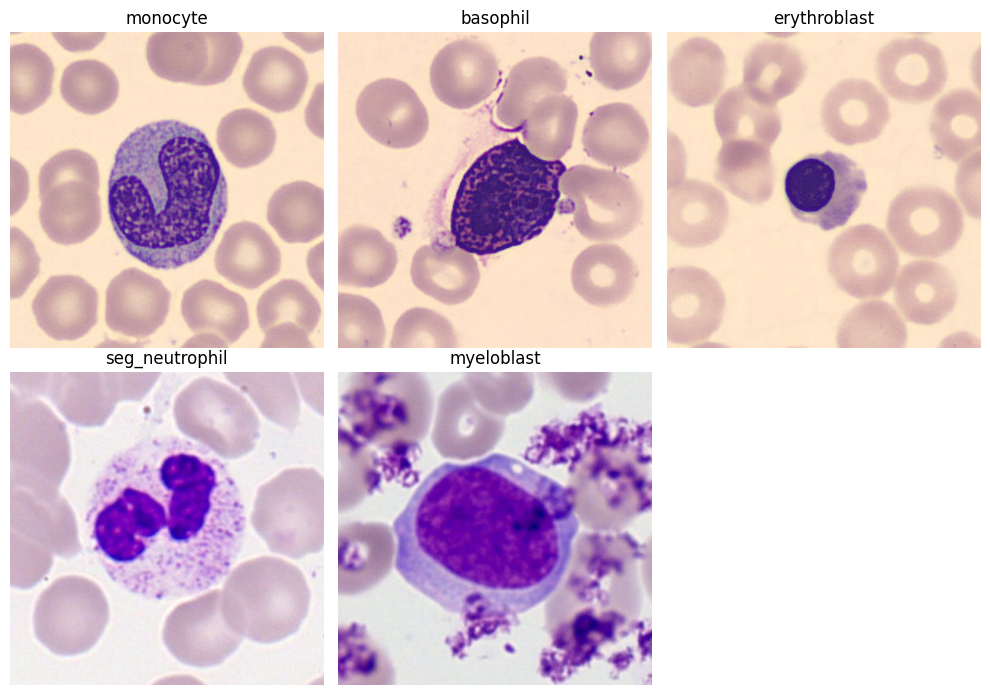

In [3]:
folder_path = "/kaggle/input/blood-cell-images-for-cancer-detection"
class_folders = os.listdir(folder_path)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))  
axes = axes.ravel()

for i, cls in enumerate(class_folders[:5]):
    img_folder_path = os.path.join(folder_path, cls)
    image_name = os.listdir(img_folder_path)[0]
    img_path = os.path.join(img_folder_path, image_name)
    image = mpimg.imread(img_path)
    axes[i].imshow(image)
    axes[i].set_title(cls)
    axes[i].axis('off')  

for j in range(i + 1, 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# <h1 style="padding: 30px;color:white;margin:10;font-size:100%;text-align:left;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Data Preparation</span></b> </h1>

In [4]:
img_height, img_width = 224, 224
batch_size = 32
folder_path = '/kaggle/input/blood-cell-images-for-cancer-detection/'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [5]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']


In [6]:
model = Sequential()

base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_tensor=Input(shape=(img_height, img_width, 3)),
                      pooling = 'avg',
                      classes = 5
                     )

for layer in base_model.layers:
    layer.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# <h1 style="padding: 30px;color:white;margin:10;font-size:100%;text-align:left;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Model Training</span></b> </h1>

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 569ms/step - accuracy: 0.2736 - loss: 1.6633 - val_accuracy: 0.3940 - val_loss: 1.3704
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 416ms/step - accuracy: 0.5131 - loss: 1.2747 - val_accuracy: 0.5980 - val_loss: 1.1109
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 56s 424ms/step - accuracy: 0.6512 - loss: 1.0366 - val_accuracy: 0.6420 - val_loss: 0.9428
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 415ms/step - accuracy: 0.6981 - loss: 0.8662 - val_accuracy: 0.6560 - val_loss: 0.9005
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 416ms/step - accuracy: 0.6989 - loss: 0.8000 - val_accuracy: 0.6340 - val_loss: 0.8017
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 417ms/step - accuracy: 0.7301 - loss: 0.7057 - val_accuracy: 0.7470 - val_loss: 0.7231
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 413ms/step - accuracy: 0.7617 - loss: 0.6596 - val_accuracy: 0.7940 - val_loss: 0.5960
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 417ms/step - accuracy: 0.8014 - loss: 0.5834 - val

# <h1 style="padding: 30px;color:white;margin:10;font-size:100%;text-align:left;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Loss and Accuracy Visualization</span></b> </h1>

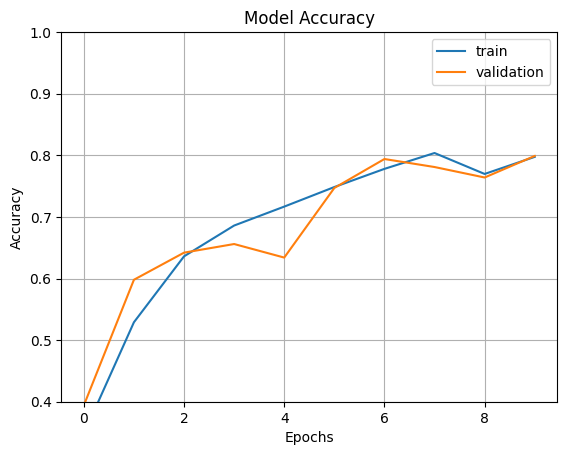

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

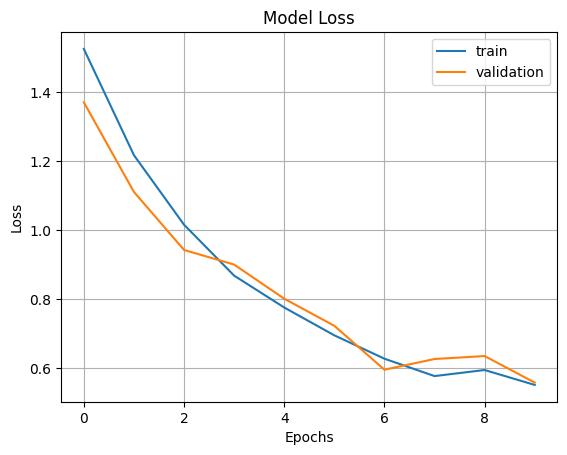

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# <h1 style="padding: 30px;color:white;margin:10;font-size:100%;text-align:left;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Testing</span></b> </h1>

In [12]:
test_img_path = '/kaggle/input/blood-cell-images-for-cancer-detection/erythroblast/ERB_101031.jpg'
image = cv2.imread(test_img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
image = cv2.resize(image, (224, 224))          
image = image / 255.0                         
image = np.expand_dims(image, axis=0)          

pred = model.predict(image)
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The predicted class is erythroblast


# <h1 style="padding: 30px;color:white;margin:10;font-size:100%;text-align:left;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Thank You</span></b> </h1>